# i. Perkenalan

# ii. Import Libraries

In [33]:
# Import Statistics Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, pointbiserialr

# Sklearn Libraries for Classification ML
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall
from tensorflow.random import set_seed

import time

# Save and Load Libraries
import pickle

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

# iii. Data Loading

In [34]:
# Load data untuk dataset EDA
df = pd.read_csv('dataset/P2_FinPro_Final_Record.csv')
df

,id,gender,car,realty,child_number,income,occupation,education,marital_status,house_type,...,mobile_phone,work_phone,phone,email,family_size,months_balance,status,begin_month,credit_approval,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,0,C,-15,No,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-1,C,-15,No,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-2,C,-15,No,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-3,C,-15,No,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-4,C,-15,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-9,0,-13,No,1
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-10,2,-13,No,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-11,1,-13,No,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-12,0,-13,No,1


## Mengecek ukuran dataset

In [35]:
print(f'Datase ini memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')

Datase ini memiliki 777715 baris dan 22 kolom


## Mengecek informasi dataset

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               777715 non-null  int64  
 1   gender           777715 non-null  object 
 2   car              777715 non-null  object 
 3   realty           777715 non-null  object 
 4   child_number     777715 non-null  int64  
 5   income           777715 non-null  float64
 6   occupation       777715 non-null  object 
 7   education        777715 non-null  object 
 8   marital_status   777715 non-null  object 
 9   house_type       777715 non-null  object 
 10  days_birth       777715 non-null  int64  
 11  days_employed    777715 non-null  int64  
 12  mobile_phone     777715 non-null  int64  
 13  work_phone       777715 non-null  int64  
 14  phone            777715 non-null  int64  
 15  email            777715 non-null  int64  
 16  family_size      777715 non-null  floa

## Mengecek statistik sederhana dataset

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,777715.0,5.078743e+06,41804.424817,5008804.0,5044568.5,5069530.0,5115551.0,5150487.0
child_number,777715.0,4.280823e-01,0.745755,0.0,0.0,0.0,1.0,19.0
income,777715.0,1.885348e+05,101622.450077,27000.0,121500.0,162000.0,225000.0,1575000.0
days_birth,777715.0,-1.612494e+04,4104.304018,-25152.0,-19453.0,-15760.0,-12716.0,-7489.0
days_employed,777715.0,5.777583e+04,136471.735391,-15713.0,-3292.0,-1682.0,-431.0,365243.0
mobile_phone,777715.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
work_phone,777715.0,2.318176e-01,0.421993,0.0,0.0,0.0,0.0,1.0
phone,777715.0,3.009650e-01,0.458678,0.0,0.0,0.0,1.0,1.0
email,777715.0,9.167497e-02,0.288567,0.0,0.0,0.0,0.0,1.0
family_size,777715.0,2.208837e+00,0.907380,1.0,2.0,2.0,3.0,20.0


## Mengecek missing value

In [38]:
df.isna().sum()

id                 0
gender             0
car                0
realty             0
child_number       0
income             0
occupation         0
education          0
marital_status     0
house_type         0
days_birth         0
days_employed      0
mobile_phone       0
work_phone         0
phone              0
email              0
family_size        0
months_balance     0
status             0
begin_month        0
credit_approval    0
target             0
dtype: int64

## Mengecek data duplikat

In [39]:
print(f'Terdapat {df.duplicated().sum()} data duplikat')

Terdapat 0 data duplikat


# v. Feature Engineering

## Feature Creation

#### Age

Mengubah days_birth menjadi age

In [40]:
df['age'] = (-df['days_birth'] // 365)


#### Years of Employment

In [41]:
df['years_employed'] = df['days_employed'].apply(lambda x: 0 if x > 0 else int(-x // 365))

#### Education Income Ratio

In [42]:
edu_order = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}

df['education_ordinal'] = df['education'].map(edu_order)

In [43]:
df['education_income_ratio'] = df['education_ordinal'] / df['income']

### Income per Person

Formula: income / family_size

Reason:

A person with a high income but many dependents may still struggle financially. This feature captures the financial capacity per individual in the household, which is more informative than just total income

Relationship to credit approval:

The higher the income per person, the better the repayment capacity, increasing the likelihood of credit approval

In [44]:
df['income_per_person'] = df['income'] / df['family_size'].replace(0, 1)

### has child ?

Formula: child_number > 0 (Boolean 1/0)

Reason:

Having children generally increases financial responsibilities and monthly expenses.

Relationship to credit approval:

Applicants with children might be viewed as higher risk, especially if their income is not significantly high, because their financial obligations are greater

In [45]:
df['has_child'] = (df['child_number'] > 0).astype(int)

### low income ?

Formula:
1 if income < median_income, else 0

Reason:

Applicants below median income are considered to have relatively limited financial resources compared to the population

Relationship to Credit Approval:

Lower income correlates with reduced repayment ability, leading to higher perceived risk for lenders

In [46]:
median_income = df['income'].median()
median_income

162000.0

In [47]:
df['low_income'] = (df['income'] < median_income).astype(int)

### Has child and low income ?

Formula:
1 if has_child == 1 and income < median_income, else 0

Reason:

Applicants who have children and earn below the median income are likely to face higher financial burdens with limited financial capacity

Relationship to Credit Approval:

Applicants with both children and low income are typically considered higher risk, making credit approval less likely

In [48]:
df['has_child_and_low_income'] = ((df['has_child'] == 1) & (df['income'] < median_income)).astype(int)

### Financial Dependence Ratio

Formula:

family_size / (1 + child_number)<br/>
(Avoid division by zero; if no children, denominator = 1)

Reason:

This captures the proportion of adults vs dependents in the household. A lower ratio suggests fewer adults supporting more dependents

In [49]:
df['financial_dependence_ratio'] = df['family_size']/(1 + df['child_number'])

### Is Single ?

Formula: marital_status == 'Single' (Boolean 1/0)

Reason:

Marital status influences financial burdens and spending patterns. Single individuals often have more predictable expenses and fewer obligations

Relationship to credit approval:

Single applicants are sometimes seen as lower risk due to simpler financial circumstances, potentially improving approval chances

In [50]:
df['is_single'] = df['marital_status'].isin(['Single / not married', 'Separated', 'Widow']).astype(int)

In [51]:
df.columns

Index(['id', 'gender', 'car', 'realty', 'child_number', 'income', 'occupation',
       'education', 'marital_status', 'house_type', 'days_birth',
       'days_employed', 'mobile_phone', 'work_phone', 'phone', 'email',
       'family_size', 'months_balance', 'status', 'begin_month',
       'credit_approval', 'target', 'age', 'years_employed',
       'education_ordinal', 'education_income_ratio', 'income_per_person',
       'has_child', 'low_income', 'has_child_and_low_income',
       'financial_dependence_ratio', 'is_single'],
      dtype='object')

Fitur yang dihapus karena sudah digantikan oleh fitur lain

## House Type per Income

In [52]:
house_type_order = {
    'With parents': 0,
    'Municipal apartment': 1,
    'Rented apartment': 2,
    'Office apartment': 3,
    'House / apartment': 4,
    'Co-op apartment': 5
}

df['house_type_ordinal'] = df['house_type'].map(house_type_order)

df['house_income_ratio'] = df['house_type_ordinal'] / df['income']

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          777715 non-null  int64  
 1   gender                      777715 non-null  object 
 2   car                         777715 non-null  object 
 3   realty                      777715 non-null  object 
 4   child_number                777715 non-null  int64  
 5   income                      777715 non-null  float64
 6   occupation                  777715 non-null  object 
 7   education                   777715 non-null  object 
 8   marital_status              777715 non-null  object 
 9   house_type                  777715 non-null  object 
 10  days_birth                  777715 non-null  int64  
 11  days_employed               777715 non-null  int64  
 12  mobile_phone                777715 non-null  int64  
 13  work_phone    

In [54]:
df = df.drop(columns=['id', 'education', 'days_birth', 'days_employed', 'begin_month', 'target', 'status', 'mobile_phone', 'family_size', 'income', 'child_number', 'marital_status', 'education_ordinal', 'house_type', 'house_type_ordinal'])

In [55]:
cat_cols = ['gender', 'car', 'realty', 'occupation']
num_cols = ['months_balance', 'age', 'years_employed', 'education_income_ratio', 'income_per_person', 'financial_dependence_ratio', 'house_income_ratio']
exclude_cols = ['work_phone', 'email', 'phone', 'has_child', 'low_income', 'has_child_and_low_income', 'is_single']

num_cols = [col for col in num_cols if col not in exclude_cols]

print(num_cols)
print(cat_cols)
print(exclude_cols)

['months_balance', 'age', 'years_employed', 'education_income_ratio', 'income_per_person', 'financial_dependence_ratio', 'house_income_ratio']
['gender', 'car', 'realty', 'occupation']
['work_phone', 'email', 'phone', 'has_child', 'low_income', 'has_child_and_low_income', 'is_single']


Mengubah fitur credit_approval (target) menjadi binary

In [56]:
df['credit_approval'] = df['credit_approval'].map({'Yes': 0, 'No':1})

## Handling Cardinality

In [57]:
# Set display untuk filter kolom nantinya
pd.set_option('display.max_colwidth', None)

listCols = []
for col in cat_cols:
    listCols.append([col, df[col].nunique(), df[col].unique()])


pd.DataFrame(columns=['Nama Kolom', 'Jumlah Nilai Unique', 'Nilai Unique'], data=listCols)

,Nama Kolom,Jumlah Nilai Unique,Nilai Unique
0,gender,2,"[M, F]"
1,car,2,"[Y, N]"
2,realty,2,"[Y, N]"
3,occupation,5,"[Working, Commercial associate, Pensioner, State servant, Student]"


## Split fitur dan target

In [58]:
# Splitting antara X dan Y
X = df.drop(['credit_approval'], axis=1) # Features
y = df['credit_approval'] # Target

In [59]:
X.head()

,gender,car,realty,occupation,work_phone,phone,email,months_balance,age,years_employed,education_income_ratio,income_per_person,has_child,low_income,has_child_and_low_income,financial_dependence_ratio,is_single,house_income_ratio
0,M,Y,Y,Working,1,0,0,0,32,12,0.000009,213750.0,0,0,0,2.0,0,0.000005
1,M,Y,Y,Working,1,0,0,-1,32,12,0.000009,213750.0,0,0,0,2.0,0,0.000005
2,M,Y,Y,Working,1,0,0,-2,32,12,0.000009,213750.0,0,0,0,2.0,0,0.000005
3,M,Y,Y,Working,1,0,0,-3,32,12,0.000009,213750.0,0,0,0,2.0,0,0.000005
4,M,Y,Y,Working,1,0,0,-4,32,12,0.000009,213750.0,0,0,0,2.0,0,0.000005


In [60]:
y.describe()

count    777715.000000
mean          0.140887
std           0.347905
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: credit_approval, dtype: float64

## Split train set dan test set

In [61]:
# Splitting antara train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (622172, 18)
Test Size (155543, 18)


## Penangan Data Outlier

In [62]:
# Display skewness distributions and outliers

# Buat dataframe skewness dahulu dari kolom numerik
listCols2= []
for col in num_cols:
  listCols2.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),2) <= 0.5) & (round(X_train[col].skew(),2) >= -0.5),
    'normal','skewed')])

skewness = pd.DataFrame(columns=['Nama Kolom', 'Nilai Skewness', 'Distribution'], data= listCols2)
skewness

# Buat dataframe persentase outliers dahulu dari kolom numerik
column = []
lower_bound = []
upper_bound = []
Percentage_Outliers = []
for row in range (0, len(skewness)):
  col = skewness['Nama Kolom'][row]
  #checking upper and lower boundary
  if skewness['Distribution'][row] == 'Skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  Percentage_Outliers.append(totout)


outliers = pd.DataFrame({
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'Percentage Outliers': [round(Percentage_Outliers,2) for Percentage_Outliers in Percentage_Outliers],   
})

# Concat and Merge the two
frames = [skewness, outliers]
Skewness_Outliers = pd.concat(frames, ignore_index=False, axis=1)
Skewness_Outliers

,Nama Kolom,Nilai Skewness,Distribution,upper_boundary,lower_boundary,Percentage Outliers
0,months_balance,-0.6,skewed,22.86,-61.61,0.00
1,age,0.2,normal,77.40,9.92,0.00
2,years_employed,1.7,skewed,25.82,-13.90,2.05
3,education_income_ratio,2.3,skewed,0.00,-0.00,1.29
4,income_per_person,2.6,skewed,315921.05,-115152.17,1.51
5,financial_dependence_ratio,-0.5,normal,2.87,0.39,0.01
6,house_income_ratio,1.4,skewed,0.00,-0.00,1.17


In [70]:
num_cols_normal = ['financial_dependence_ratio', 'age']
num_cols_skewed = [ 'months_balance',
                    'years_employed',
                    'education_income_ratio',
                    'income_per_person',
                    'house_income_ratio']

# Model Training - Phase 1

In [71]:
# Definisikan pipeline untuk numerikal kolom dataset 2
num_transformer_normal = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

num_transformer_skewed = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

# Definisikan pipeline untuk kategorikal kolom dataset 2
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline untuk preprocessing dataset 2
preprocessing_pipeline = ColumnTransformer(transformers=[
    ('numerical_normal', num_transformer_normal, num_cols_normal),
    ('numerical_skewed', num_transformer_skewed, num_cols_skewed),
    ('categorical', cat_transformer, cat_cols),
    ('num_passthrough', 'passthrough', exclude_cols)
])

In [72]:
preprocessing_pipeline

ColumnTransformer(transformers=[('numerical_normal',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['financial_dependence_ratio', 'age']),
                                ('numerical_skewed',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', RobustScaler())]),
                                 ['months_balance', 'years_employed',
                                  'education_income_ratio', 'income_per_person',
                                  'house_income_ratio']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'car', 'realty', 'occupation']),
                                ('num_passthrough', 'passthrough',
                                 ['work_phone', 'email', 'phone', 'has_child',
                                  'low_income', 'has_child_and_low_income',
                                  'is_single'])])

In [90]:
# Pipeline dengan KNN Classifier
pipeknn = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('knn', KNeighborsClassifier())
])

# Pipeline dengan Decision Tree Classifier
pipedt = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('decisiontree', DecisionTreeClassifier(splitter='best', min_samples_split=15, min_samples_leaf=15, max_features='sqrt', class_weight='balanced', random_state=42))
])

# Pipeline dengan Random Forest Classifier
piperf= Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('randomforest', RandomForestClassifier(n_estimators=200, min_samples_split=15, min_samples_leaf=15, max_features='sqrt', n_jobs=-1, class_weight='balanced', random_state=42))
])

# # Pipeline dengan SVM Classifier
# pipesvm = Pipeline([
#     ('preprocessor', preprocessing_pipeline),
#     ('svm', SVC())
# ])

# # Pipeline dengan XGBoost Classifier
# pipexgb = Pipeline([
#     ('preprocessor', preprocessing_pipeline),
#     ('xgb', XGBClassifier())
# ])

# **Melatih model**
pipeknn.fit(X_train, y_train)
pipedt.fit(X_train, y_train)
piperf.fit(X_train, y_train)
# pipesvm.fit(X_train, y_train)
# pipexgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_normal',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['financial_dependence_ratio',
                                                   'age']),
                                                 ('numerical_skewed',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['months_balance',
                                                   'years_employed',
                                                   'education_income_ratio',
                                                   'income_...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'car', 'realty',
                                                   'occupation']),
                                                 ('num_passthrough',
                                                  'passthrough',
                                                  ['work_phone', 'email',
                                                   'phone', 'has_child',
                                                   'low_income',
                                                   'has_child_and_low_income',
                                                   'is_single'])])),
                ('randomforest',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=15,
                                        min_samples_split=15, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

In [91]:
# Fungsi Penilaian ROC AUC
def calculate_roc_curve(model, X, y):
    y_pred_proba = model.predict_proba(X)[:,1]
    fpr, tpr,_ = roc_curve(y, y_pred_proba)
    auc = roc_auc_score(y, y_pred_proba)

    if auc > 0.9:
        desc = 'Good'
    elif auc >= 0.8:
        desc = 'Fair'
    elif auc >= 0.7:
        desc = 'Decent'
    elif auc >= 0.6:
        desc = 'Not Great'
    else:
        desc = 'Poor'

    return auc, desc, fpr, tpr

In [92]:
y_pred_train_dt = pipedt.predict(X_train)
y_pred_test_dt = pipedt.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train_dt))
print('')

print('Test')
print(classification_report(y_test, y_pred_test_dt))

Train
              precision    recall  f1-score   support

           0       0.99      0.84      0.91    534516
           1       0.50      0.96      0.65     87656

    accuracy                           0.86    622172
   macro avg       0.74      0.90      0.78    622172
weighted avg       0.92      0.86      0.87    622172


Test
              precision    recall  f1-score   support

           0       0.98      0.83      0.90    133629
           1       0.48      0.92      0.63     21914

    accuracy                           0.85    155543
   macro avg       0.73      0.88      0.76    155543
weighted avg       0.91      0.85      0.86    155543



In [93]:
# Describe the AUC score
auc_dt_train, desc_train, fpr_dt_train, tpr_dt_train = calculate_roc_curve(pipedt, X_train, y_train)
auc_dt_test, desc_test, fpr_dt_test, tpr_dt_test = calculate_roc_curve(pipedt, X_test, y_test)

print('Train AUC Score:', auc_dt_train, '-', desc_train)
print('\nTest AUC Score:', auc_dt_test, '-', desc_test)

Train AUC Score: 0.9644547470129029 - Good

Test AUC Score: 0.9478671393679269 - Good


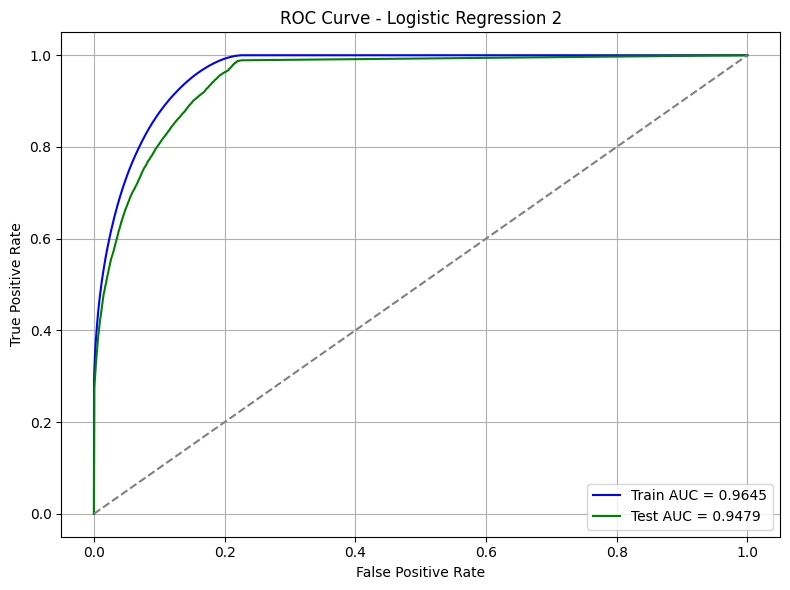

In [94]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))

# Plot ROC for Train set
plt.plot(fpr_dt_train, tpr_dt_train, label='Train AUC = {:.4f}'.format(auc_dt_train), color='blue')

# Plot ROC for Test set
plt.plot(fpr_dt_test, tpr_dt_test, label='Test AUC = {:.4f}'.format(auc_dt_test), color='green')

# Plot the diagonal line (random chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, title, legend
plt.title('ROC Curve - Logistic Regression 2')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [95]:
y_pred_train_rf = piperf.predict(X_train)
y_pred_test_rf = piperf.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train_rf))
print('')

print('Test')
print(classification_report(y_test, y_pred_test_rf))

Train
              precision    recall  f1-score   support

           0       0.99      0.87      0.93    534516
           1       0.54      0.96      0.69     87656

    accuracy                           0.88    622172
   macro avg       0.77      0.91      0.81    622172
weighted avg       0.93      0.88      0.89    622172


Test
              precision    recall  f1-score   support

           0       0.99      0.86      0.92    133629
           1       0.53      0.93      0.67     21914

    accuracy                           0.87    155543
   macro avg       0.76      0.90      0.80    155543
weighted avg       0.92      0.87      0.89    155543



In [ ]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [ ]:
preprocessing_pipeline.fit(X_train_sub)
X_train_sub_transformed = preprocessing_pipeline.transform(X_train_sub)
X_val_transformed = preprocessing_pipeline.transform(X_val)
X_test_transformed = preprocessing_pipeline.transform(X_test)

In [ ]:
seed = 42
clear_session()
np.random.seed(seed)
set_seed(seed)

ann_model = Sequential()
ann_model.add(Dense(128, activation='relu', input_shape=(X_train_sub_transformed.shape[1], )))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, mode='max')

ann_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics= ['accuracy'])
ann_model.summary()

history = ann_model.fit(X_train_sub_transformed, y_train_sub, 
          epochs=24, 
          batch_size=64, 
          validation_data=(X_val_transformed, y_val),
          verbose=0,
          callbacks=[early_stop]
        )


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# # Assuming your input shape is (num_samples, timesteps, num_features)
# model = Sequential([
#     LSTM(128, input_shape=(X_train_sub_transformed.shape[1], ), return_sequences=False),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(1, activation='sigmoid')  # Binary classification: Approved or Not
# ])

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.summary()

# Model Evaluation - Phase 1

In [ ]:
# Simpan hasil evaluasi dalam list
eval_results = []

# Evaluasi model klasifikasi dengan metrik Recall (Train & Test) dan waktu eksekusi
for model_name, model in [("KNN Classifier", pipeknn),
                          ("Decision Tree Classifier", pipedt),
                          ("Random Forest Classifier", piperf),
                          ("XGB Classifier", pipexgb)]:

    start_time = time.time()

    # Fit setiap model (bukan hanya pipeann!)
    start_fit = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start_fit

    # Prediksi data train dan test
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Hitung Recall
    recall_train = recall_score(y_train, y_pred_train, average='binary')
    recall_test = recall_score(y_test, y_pred_test, average='binary')

    exec_time = time.time() - start_time  # Hitung waktu eksekusi

    # Simpan hasil evaluasi dalam list
    eval_results.append([model_name, recall_train, recall_test, exec_time])

# Tampilkan hasil dalam bentuk tabel
eval_df = pd.DataFrame(eval_results, columns=["Model", "Recall Train", "Recall Test", "Exec Time (s)"])
print(eval_df)


KeyboardInterrupt: 

In [ ]:
# Initialization for KFold = 5
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Model and Classifier list (menggunakan pipeline)
classifiers = [pipeknn, pipedt, piperf, pipexgb]
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'ANN']

# Create a list for the results
cv_results = []

# Loop evaluasi dengan scoring recall
for name, model in zip(model_names, classifiers):
    scores_recall = cross_val_score(model, X_train, y_train, scoring='recall', cv=cv)
    
    cv_results.append({
        'Model': name,
        'CV Recall (Mean)': round(scores_recall.mean(), 4),
        'CV Recall (Stdev)': round(scores_recall.std(), 4),
    })

# Buat dataframe hasil
df_cv_eval = pd.DataFrame(cv_results)
print(df_cv_eval)

           Model  CV Recall (Mean)  CV Recall (Stdev)
0            KNN            0.9608             0.0006
1  Decision Tree            0.9326             0.0006
2  Random Forest            0.9520             0.0005
3        XGBoost            0.9919             0.0004


In [ ]:
# Prediksi probabilitas
y_pred_proba_train = ann_model.predict(X_train_sub_transformed)
y_pred_proba_test = ann_model.predict(X_test_transformed)

# Threshold default
y_pred_train = (y_pred_proba_train > 0.5).astype(int)
y_pred_tes = (y_pred_proba_test > 0.5).astype(int)

15555/15555 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


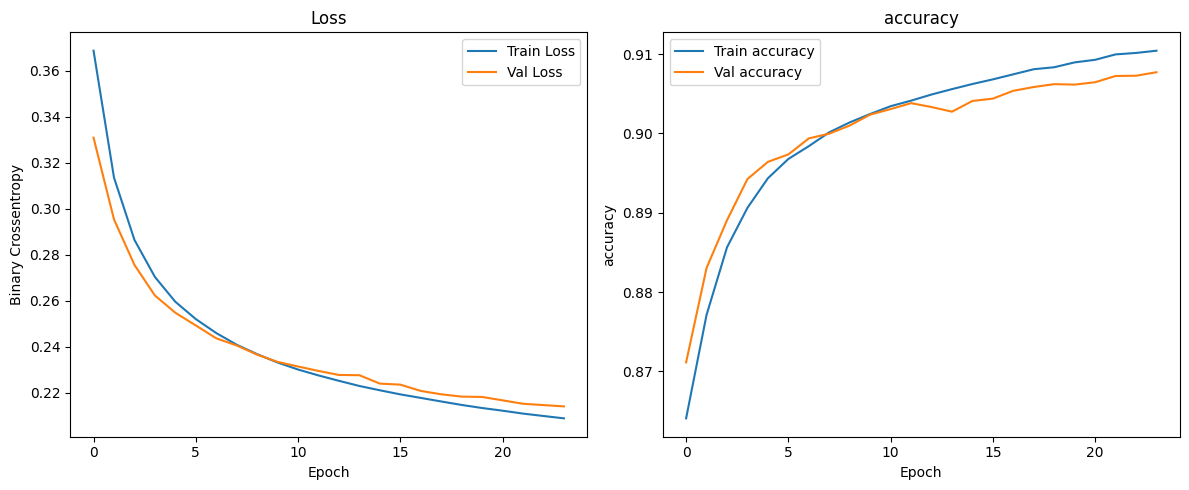

In [ ]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()

# Plot recall
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("Train:")
print(classification_report(y_train_sub, y_pred_train))
print("Test:")
print(classification_report(y_test, y_pred_tes))

Train:
              precision    recall  f1-score   support

           0       0.73      0.57      0.64     70125
           1       0.93      0.97      0.95    427612

    accuracy                           0.91    497737
   macro avg       0.83      0.77      0.80    497737
weighted avg       0.90      0.91      0.91    497737

Test:
              precision    recall  f1-score   support

           0       0.72      0.56      0.63     21914
           1       0.93      0.97      0.95    133629

    accuracy                           0.91    155543
   macro avg       0.83      0.76      0.79    155543
weighted avg       0.90      0.91      0.90    155543



In [ ]:
y_pred_train = pipexgb.predict(X_train)
y_pred_test = pipexgb.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.85      0.27      0.41     87656
           1       0.89      0.99      0.94    534516

    accuracy                           0.89    622172
   macro avg       0.87      0.63      0.68    622172
weighted avg       0.89      0.89      0.87    622172


Test
              precision    recall  f1-score   support

           0       0.84      0.27      0.40     21914
           1       0.89      0.99      0.94    133629

    accuracy                           0.89    155543
   macro avg       0.87      0.63      0.67    155543
weighted avg       0.88      0.89      0.86    155543



In [ ]:
y_pred_train = pipedt.predict(X_train)
y_pred_test = pipedt.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     87656
           1       0.96      0.96      0.96    534516

    accuracy                           0.94    622172
   macro avg       0.87      0.87      0.87    622172
weighted avg       0.94      0.94      0.94    622172


Test
              precision    recall  f1-score   support

           0       0.61      0.61      0.61     21914
           1       0.94      0.93      0.94    133629

    accuracy                           0.89    155543
   macro avg       0.77      0.77      0.77    155543
weighted avg       0.89      0.89      0.89    155543



In [ ]:
y_pred_train = pipeknn.predict(X_train)
y_pred_test = pipeknn.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.82      0.70      0.75     87656
           1       0.95      0.97      0.96    534516

    accuracy                           0.94    622172
   macro avg       0.88      0.83      0.86    622172
weighted avg       0.93      0.94      0.93    622172


Test
              precision    recall  f1-score   support

           0       0.71      0.61      0.66     21914
           1       0.94      0.96      0.95    133629

    accuracy                           0.91    155543
   macro avg       0.82      0.78      0.80    155543
weighted avg       0.91      0.91      0.91    155543



In [ ]:
y_pred_train = piperf.predict(X_train)
y_pred_test = piperf.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.83      0.70      0.76     87656
           1       0.95      0.98      0.96    534516

    accuracy                           0.94    622172
   macro avg       0.89      0.84      0.86    622172
weighted avg       0.94      0.94      0.94    622172


Test
              precision    recall  f1-score   support

           0       0.67      0.58      0.62     21914
           1       0.93      0.95      0.94    133629

    accuracy                           0.90    155543
   macro avg       0.80      0.76      0.78    155543
weighted avg       0.89      0.90      0.90    155543



In [ ]:
# df[num_cols]

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# # Pilih hanya fitur numerik untuk VIF
# numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['target'])
# X = add_constant(numerical_features)  # Tambahkan intercept

# vif_scores = pd.DataFrame()
# vif_scores['Feature'] = X.columns
# vif_scores['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# print(vif_scores.sort_values(by='VIF', ascending=False))